___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

The domain you must have remembered it because you are worked on under project **"EDA for Car Price Prediction Model"**. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will use the data sets prepared for algorithms as a result of the EDA project.

So this study assumes that you are working on the EDA project and that you have sufficient domain knowledge.

Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this case, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression, Random Forest*** and ***XG Boost*** algorithms respectively. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import pickle

In [4]:
with open('golden_data_dummy.pkl', 'rb') as f:
    df = pickle.load(f)

In [5]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,1422.0,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14990 entries, 0 to 15918
Columns: 136 entries, displacement to type_Used
dtypes: float64(86), int64(5), uint8(45)
memory usage: 11.2 MB


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop("price", axis=1)
y = df["price"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lm.intercept_

12830.787409472512

In [13]:
lm.coef_

array([-9.97044676e-01,  9.98013433e+01, -3.68618010e-02, -3.73481919e+01,
       -3.87519032e+00,  3.06957402e+02,  1.49667604e+02, -4.06703945e+02,
       -2.60071642e+02,  1.64490478e+01, -2.65978169e+02, -1.99898428e+01,
       -1.75406519e+02, -2.63270637e+02,  3.26011680e+01, -7.89665027e+02,
       -1.52506764e+02, -1.06039169e+02, -2.48150014e+02, -3.41460826e+02,
       -2.31342472e+02,  6.77319074e+02,  7.96759456e+02,  4.95009340e+02,
        5.27327286e+02, -4.78757400e+02, -5.27573893e+02,  1.33126134e+02,
        1.32163148e+02,  2.15052627e+02, -1.73860452e+01, -4.11376651e+02,
        9.54034392e+01, -1.32608444e+02, -1.59412600e+03, -5.91618464e+02,
        1.58474619e+02,  9.19645263e+02, -6.37699962e+01, -9.23158792e+01,
        8.09742643e+00,  3.72787895e+02, -1.87542735e+02, -1.41390824e+03,
       -2.18264565e+02,  3.12935003e+02,  3.80956162e+01, -9.80534648e+01,
        3.36678401e+02,  3.97653793e+02, -3.63895582e+01,  2.84477427e+02,
       -2.65023826e+02,  

In [14]:
y_pred=lm.predict(X_test)

In [15]:
eval_metrics(y_test, y_pred)

r2_score: 0.8942625166220455 
 mae: 1658.8190343422516 
 mse: 5334910.266717452 
 rmse: 2309.742467617862


In [16]:
lm.score(X_train,y_train)

0.8902134555790087

In [17]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [18]:
compare.sample(10)

,Actual,Pred
9058,7690,7396.028864
5398,24950,25350.522021
4791,21480,19127.959400
12306,19290,21100.972219
3264,13280,12757.823032
9499,9550,10967.226465
8269,13400,13098.824648
1017,20457,19774.564073
8394,12788,15852.305412
11648,17500,19075.066442


In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8858192060207524

In [21]:
accuraries

array([0.88314633, 0.88407226, 0.87679014, 0.89047024, 0.88813214,
       0.88248513, 0.88080806, 0.88245504, 0.90636267, 0.88347006])

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [22]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
ridge_model = Ridge()

In [28]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [29]:
eval_metrics(y_test,y_pred)

r2_score: 0.8942645536963225 
 mae: 1658.7981513900927 
 mse: 5334807.4875692455 
 rmse: 2309.7202184613716


In [30]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8857997857260876

In [31]:
alpha_space = np.linspace(0.1, 100, 100)
alpha_space

array([  0.1       ,   1.10909091,   2.11818182,   3.12727273,
         4.13636364,   5.14545455,   6.15454545,   7.16363636,
         8.17272727,   9.18181818,  10.19090909,  11.2       ,
        12.20909091,  13.21818182,  14.22727273,  15.23636364,
        16.24545455,  17.25454545,  18.26363636,  19.27272727,
        20.28181818,  21.29090909,  22.3       ,  23.30909091,
        24.31818182,  25.32727273,  26.33636364,  27.34545455,
        28.35454545,  29.36363636,  30.37272727,  31.38181818,
        32.39090909,  33.4       ,  34.40909091,  35.41818182,
        36.42727273,  37.43636364,  38.44545455,  39.45454545,
        40.46363636,  41.47272727,  42.48181818,  43.49090909,
        44.5       ,  45.50909091,  46.51818182,  47.52727273,
        48.53636364,  49.54545455,  50.55454545,  51.56363636,
        52.57272727,  53.58181818,  54.59090909,  55.6       ,
        56.60909091,  57.61818182,  58.62727273,  59.63636364,
        60.64545455,  61.65454545,  62.66363636,  63.67

In [32]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([  0.1       ,   1.10909091,   2.11818182,   3.12727273,
         4.13636364,   5.14545455,   6.15454545,   7.16363636,
         8.17272727,   9.18181818,  10.19090909,  11.2       ,
        12.20909091,  13.21818182,  14.22727273,  15.23636364,
        16.24545455,  17.25454545,  18.26363636,  19.27272727,
        20.28181818,  21.29090909,  22.3       ,  23.30909091,
        24.31818182,  25.32727273,  26.33636364,  27.34545455,
        28.35454545,  29.36363636...
        76.79090909,  77.8       ,  78.80909091,  79.81818182,
        80.82727273,  81.83636364,  82.84545455,  83.85454545,
        84.86363636,  85.87272727,  86.88181818,  87.89090909,
        88.9       ,  89.90909091,  90.91818182,  91.92727273,
        92.93636364,  93.94545455,  94.95454545,  95.96363636,
        96.97272727,  97.98181818,  98.99090909, 100.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [33]:
ridgecv.alpha_

46.518181818181816

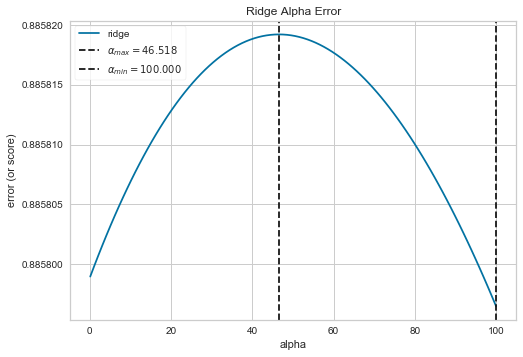

In [34]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 100, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [35]:
ridge_model = Ridge(46.52).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8943403409038103 
 mae: 1657.8958671880173 
 mse: 5330983.697382498 
 rmse: 2308.8923096113635


In [36]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8858191913741418

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [37]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [38]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8942890191151263 
 mae: 1658.3821509237362 
 mse: 5333573.102091308 
 rmse: 2309.4529876339348


In [39]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8858543682301276

In [40]:
alpha_space = np.linspace(0.1, 100, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)
lasso_cv_model.alpha_

4.136363636363636

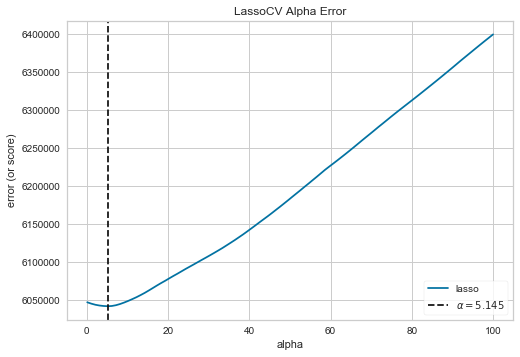

In [41]:
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against

alpha_space = np.linspace(0.1, 100, 100)

# Instantiate the linear model and visualizer

model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [42]:
lasso_model = Lasso(4.14).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8943254905969907 
 mae: 1657.500796392772 
 mse: 5331732.959155945 
 rmse: 2309.0545595883923


In [43]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.885920616113412

In [44]:
lasso_model = Lasso(5.15).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8943144101461986 
 mae: 1657.239588505252 
 mse: 5332292.015498142 
 rmse: 2309.175613828048


In [45]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8859187432671766

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___